In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import json

In [10]:
train_df = pd.read_csv('./train/train.csv')

In [4]:
#df = train_df.merge(train_meta_df[['PetID', 'meta_label']], on='PetID', how='outer')

In [9]:
glob('./train_sentiment/*.json')

['./train_sentiment\\0008c5398.json',
 './train_sentiment\\000a290e4.json',
 './train_sentiment\\000fb9572.json',
 './train_sentiment\\0011d7c25.json',
 './train_sentiment\\00156db4a.json',
 './train_sentiment\\001a1aaad.json',
 './train_sentiment\\001b1507c.json',
 './train_sentiment\\002230dea.json',
 './train_sentiment\\002278114.json',
 './train_sentiment\\0038234c6.json',
 './train_sentiment\\0038c9343.json',
 './train_sentiment\\003dd2e26.json',
 './train_sentiment\\0045ed62a.json',
 './train_sentiment\\004709939.json',
 './train_sentiment\\004a26127.json',
 './train_sentiment\\004c2f355.json',
 './train_sentiment\\0052dcf47.json',
 './train_sentiment\\00553ae55.json',
 './train_sentiment\\0058586f1.json',
 './train_sentiment\\005afe792.json',
 './train_sentiment\\005bb92d8.json',
 './train_sentiment\\0063bd7e0.json',
 './train_sentiment\\0063f83c9.json',
 './train_sentiment\\00648f96f.json',
 './train_sentiment\\006610fe3.json',
 './train_sentiment\\006d301e9.json',
 './train_se

In [5]:
train_stm_df = pd.DataFrame(glob('./train_sentiment/*.json'), columns=['file'])
train_stm_df.file = train_stm_df.file.apply(lambda x: x.replace('\\','/'))
train_stm_df['PetID'] = train_stm_df.file.apply(lambda x: x.split('/')[-1].split('.')[0])
train_stm_df = train_stm_df.merge(train_df[['PetID', 'AdoptionSpeed']], on='PetID')

test_stm_df = pd.DataFrame(glob('./test_sentiment/*.json'), columns=['file'])
test_stm_df.file = test_stm_df.file.apply(lambda x: x.replace('\\','/'))
test_stm_df['PetID'] = test_stm_df.file.apply(lambda x: x.split('/')[-1].split('.')[0])

train_stm_df.tail()

,file,PetID,AdoptionSpeed
14437,./train_sentiment/fff24fcb5.json,fff24fcb5,1
14438,./train_sentiment/fff4a6420.json,fff4a6420,2
14439,./train_sentiment/fff6f2f61.json,fff6f2f61,2
14440,./train_sentiment/fffd78a11.json,fffd78a11,2
14441,./train_sentiment/fffd9b5a8.json,fffd9b5a8,1


In [6]:
def read_json(path):
    with open(path, encoding='utf8') as f:
        img = json.load(f)
        return tuple(img.keys())

In [7]:
train_stm = []
for path in train_stm_df.file.values:
    train_stm.append(read_json(path))

In [8]:
from collections import Counter

In [9]:
Counter(train_stm)

Counter({('sentences',
          'tokens',
          'entities',
          'documentSentiment',
          'language',
          'categories'): 14442})

In [35]:
with open('train_sentiment/cf7d3eec0.json', encoding='utf8') as f:
    stm = json.load(f)

In [14]:
stm.keys()

dict_keys(['sentences', 'tokens', 'entities', 'documentSentiment', 'language', 'categories'])

In [27]:
train_df.Description[0]

"Nibble is a 3+ month old ball of cuteness. He is energetic and playful. I rescued a couple of cats a few months ago but could not get them neutered in time as the clinic was fully scheduled. The result was this little kitty. I do not have enough space and funds to care for more cats in my household. Looking for responsible people to take over Nibble's care."

In [43]:
stm['documentSentiment']

{'magnitude': 3.1, 'score': 0.2}

In [36]:
stm['sentences']

[{'text': {'content': 'Garfield is a very large cat.', 'beginOffset': -1},
  'sentiment': {'magnitude': 0, 'score': 0}},
 {'text': {'content': 'Needs daily grooming.', 'beginOffset': -1},
  'sentiment': {'magnitude': 0.1, 'score': -0.1}},
 {'text': {'content': 'He has been groomed short and deflea.',
   'beginOffset': -1},
  'sentiment': {'magnitude': 0.2, 'score': 0.2}},
 {'text': {'content': 'Very good wt other cats.', 'beginOffset': -1},
  'sentiment': {'magnitude': 0.8, 'score': 0.8}},
 {'text': {'content': 'Calm cat.', 'beginOffset': -1},
  'sentiment': {'magnitude': 0.8, 'score': 0.8}},
 {'text': {'content': 'He is neutered, vaccinated and dewormed.',
   'beginOffset': -1},
  'sentiment': {'magnitude': 0, 'score': 0}},
 {'text': {'content': 'Must be kept indoors.', 'beginOffset': -1},
  'sentiment': {'magnitude': 0.1, 'score': 0.1}},
 {'text': {'content': 'Needs grooming and brushing as his fur is very soft and thick.',
   'beginOffset': -1},
  'sentiment': {'magnitude': 0.4, 'sc

In [37]:
stm['tokens']

[]

In [38]:
stm['entities']

[{'name': 'Garfield',
  'type': 'PERSON',
  'metadata': {'mid': '/m/03dpt',
   'wikipedia_url': 'https://en.wikipedia.org/wiki/Garfield'},
  'salience': 0.57157254,
  'mentions': [{'text': {'content': 'Garfield', 'beginOffset': -1},
    'type': 'PROPER'},
   {'text': {'content': 'Garfield', 'beginOffset': -1}, 'type': 'PROPER'}]},
 {'name': 'cat',
  'type': 'OTHER',
  'metadata': {},
  'salience': 0.20979805,
  'mentions': [{'text': {'content': 'cat', 'beginOffset': -1},
    'type': 'COMMON'}]},
 {'name': 'grooming',
  'type': 'OTHER',
  'metadata': {},
  'salience': 0.075586505,
  'mentions': [{'text': {'content': 'grooming', 'beginOffset': -1},
    'type': 'COMMON'}]},
 {'name': 'deflea',
  'type': 'OTHER',
  'metadata': {},
  'salience': 0.029271793,
  'mentions': [{'text': {'content': 'deflea', 'beginOffset': -1},
    'type': 'COMMON'}]},
 {'name': 'cat',
  'type': 'OTHER',
  'metadata': {},
  'salience': 0.022427632,
  'mentions': [{'text': {'content': 'cat', 'beginOffset': -1},
 

In [40]:
stm['language']

'en'

In [41]:
stm['categories']

[]

### 1. documentSentiment

In [44]:
def documentSentiment_magnitude(path):
    with open(path, encoding='utf8') as f:
        stm = json.load(f)           
    return stm['documentSentiment']['magnitude']

def documentSentiment_score(path):
    with open(path, encoding='utf8') as f:
        stm = json.load(f)           
    return stm['documentSentiment']['score']

def documentSentiment_sentences(path):
    with open(path, encoding='utf8') as f:
        stm = json.load(f)           
    return len(stm['sentences'])

In [64]:
train_stm_df['doc_stm_mag'] = train_stm_df.file.apply(documentSentiment_magnitude)
test_stm_df['doc_stm_mag'] = test_stm_df.file.apply(documentSentiment_magnitude)

train_stm_df['doc_stm_scr'] = train_stm_df.file.apply(documentSentiment_score)
test_stm_df['doc_stm_scr'] = test_stm_df.file.apply(documentSentiment_score)

train_stm_df['sentences'] = train_stm_df.file.apply(documentSentiment_sentences)
test_stm_df['sentences'] = test_stm_df.file.apply(documentSentiment_sentences)

train_stm_df['sentiment'] = train_stm_df.doc_stm_scr * train_stm_df.doc_stm_mag / train_stm_df.sentences
test_stm_df['sentiment'] = test_stm_df.doc_stm_scr * test_stm_df.doc_stm_mag / test_stm_df.sentences

In [67]:
train_stm_df.tail()

,file,PetID,AdoptionSpeed,doc_stm_mag,doc_stm_scr,sentences,sentiment
14437,./train_sentiment/fff24fcb5.json,fff24fcb5,1,1.2,0.3,3,0.1200
14438,./train_sentiment/fff4a6420.json,fff4a6420,2,3.7,0.9,4,0.8325
14439,./train_sentiment/fff6f2f61.json,fff6f2f61,2,3.3,0.5,6,0.2750
14440,./train_sentiment/fffd78a11.json,fffd78a11,2,1.6,0.8,2,0.6400
14441,./train_sentiment/fffd9b5a8.json,fffd9b5a8,1,0.9,0.9,1,0.8100


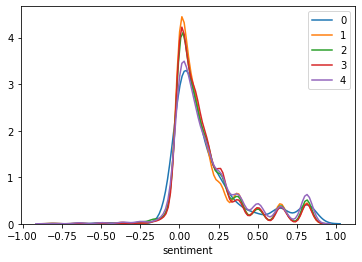

In [122]:
for i in range(5):
    sns.distplot(train_stm_df.loc[train_stm_df.AdoptionSpeed == i, 'sentiment'], hist=False, label=i)

### 2. Language

In [71]:
def language(path):
    with open(path, encoding='utf8') as f:
        stm = json.load(f)           
    return stm['language']

In [72]:
train_stm_df['language'] = train_stm_df.file.apply(language)
test_stm_df['language'] = test_stm_df.file.apply(language)

In [74]:
train_stm_df.tail()

,file,PetID,AdoptionSpeed,doc_stm_mag,doc_stm_scr,sentences,sentiment,language
14437,./train_sentiment/fff24fcb5.json,fff24fcb5,1,1.2,0.3,3,0.1200,en
14438,./train_sentiment/fff4a6420.json,fff4a6420,2,3.7,0.9,4,0.8325,en
14439,./train_sentiment/fff6f2f61.json,fff6f2f61,2,3.3,0.5,6,0.2750,en
14440,./train_sentiment/fffd78a11.json,fffd78a11,2,1.6,0.8,2,0.6400,en
14441,./train_sentiment/fffd9b5a8.json,fffd9b5a8,1,0.9,0.9,1,0.8100,en


In [76]:
Counter(train_stm_df.language)

Counter({'en': 14309, 'zh': 95, 'zh-Hant': 36, 'de': 2})

Text(0.5, 1.0, 'Others')

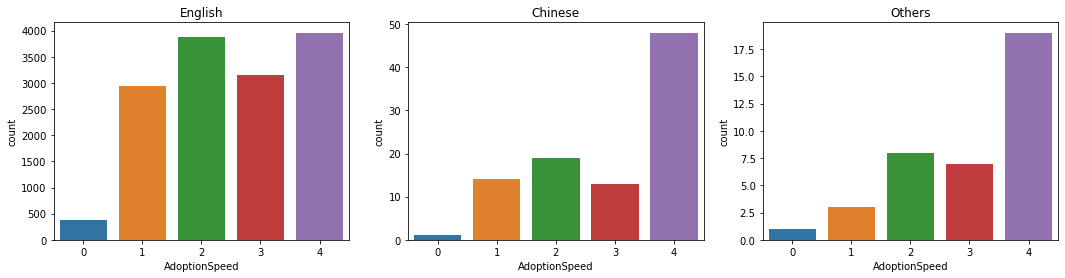

In [121]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.countplot(x='AdoptionSpeed', data=train_stm_df.loc[train_stm_df.language == 'en'])
plt.title('English')
plt.subplot(1,3,2)
sns.countplot(x='AdoptionSpeed', data=train_stm_df.loc[train_stm_df.language == 'zh'])
plt.title('Chinese')
plt.subplot(1,3,3)
sns.countplot(x='AdoptionSpeed', data=train_stm_df.loc[(train_stm_df.language == 'zh-Hant') | (train_stm_df.language == 'de')])
plt.title('Others')

In [83]:
train_stm_df['english'] = train_stm_df.language.apply(lambda x: 1 if x == 'en' else 0)
test_stm_df['english'] = test_stm_df.language.apply(lambda x: 1 if x == 'en' else 0)

In [86]:
train_stm_df.tail()

,file,PetID,AdoptionSpeed,doc_stm_mag,doc_stm_scr,sentences,sentiment,language,english
14437,./train_sentiment/fff24fcb5.json,fff24fcb5,1,1.2,0.3,3,0.1200,en,1
14438,./train_sentiment/fff4a6420.json,fff4a6420,2,3.7,0.9,4,0.8325,en,1
14439,./train_sentiment/fff6f2f61.json,fff6f2f61,2,3.3,0.5,6,0.2750,en,1
14440,./train_sentiment/fffd78a11.json,fffd78a11,2,1.6,0.8,2,0.6400,en,1
14441,./train_sentiment/fffd9b5a8.json,fffd9b5a8,1,0.9,0.9,1,0.8100,en,1


### 3. Entities

In [133]:
def entities_type(path):
    with open(path, encoding='utf8') as f:
        stm = json.load(f)
        if len(stm['entities']) == 0:
            return 'NO ENTITIES'
        else:
            return stm['entities'][0]['type']

def entities_salience(path):
    with open(path, encoding='utf8') as f:
        stm = json.load(f)
        if len(stm['entities']) == 0:
            return 0
        else:
            return stm['entities'][0]['salience']

In [134]:
train_stm_df['entities_type'] = train_stm_df.file.apply(entities_type)
test_stm_df['entities_type'] = test_stm_df.file.apply(entities_type)

train_stm_df['entities_salience'] = train_stm_df.file.apply(entities_salience)
test_stm_df['entities_salience'] = test_stm_df.file.apply(entities_salience)

In [135]:
train_stm_df.tail()

,file,PetID,AdoptionSpeed,doc_stm_mag,doc_stm_scr,sentences,sentiment,language,english,entities_type,entities_salience
14437,./train_sentiment/fff24fcb5.json,fff24fcb5,1,1.2,0.3,3,0.1200,en,1,LOCATION,0.337697
14438,./train_sentiment/fff4a6420.json,fff4a6420,2,3.7,0.9,4,0.8325,en,1,PERSON,0.944639
14439,./train_sentiment/fff6f2f61.json,fff6f2f61,2,3.3,0.5,6,0.2750,en,1,OTHER,0.216175
14440,./train_sentiment/fffd78a11.json,fffd78a11,2,1.6,0.8,2,0.6400,en,1,PERSON,0.341528
14441,./train_sentiment/fffd9b5a8.json,fffd9b5a8,1,0.9,0.9,1,0.8100,en,1,OTHER,0.556841


In [115]:
Counter(train_stm_df.entities_type)

Counter({'PERSON': 7150,
         'LOCATION': 732,
         'OTHER': 5816,
         0: 273,
         'ORGANIZATION': 209,
         'EVENT': 37,
         'CONSUMER_GOOD': 142,
         'WORK_OF_ART': 83})

In [136]:
entities_list = list(Counter(train_stm_df.entities_type).keys())

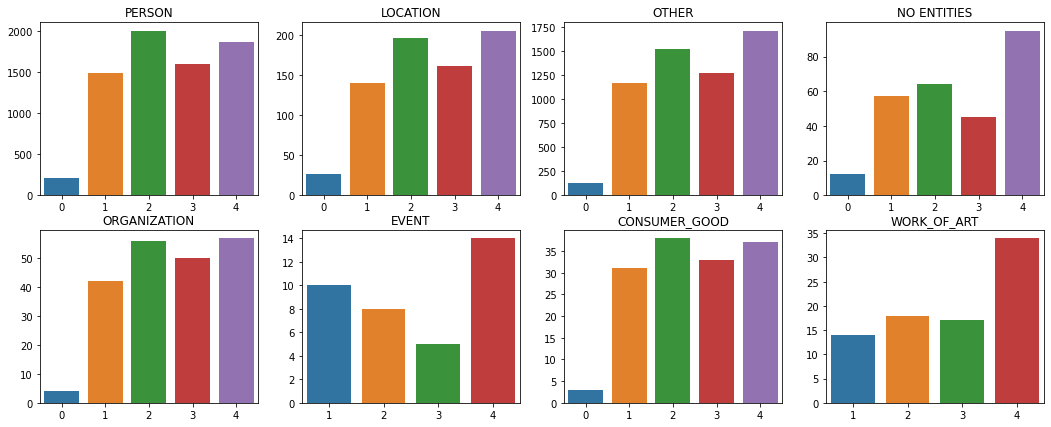

In [183]:
plt.figure(figsize=(18,7))
for i in range(8):
    plt.subplot(2,4,i+1)
    ax = sns.countplot(x='AdoptionSpeed', data=train_stm_df.loc[train_stm_df.entities_type == entities_list[i]])
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.title(entities_list[i]) 

### 4. Tokens

In [163]:
def tokens(path):
    with open(path, encoding='utf8') as f:
        stm = json.load(f)
        if stm['tokens'] == []:
            return 0
        else:
            return stm['tokens']

In [164]:
token = train_stm_df.file.apply(tokens)

In [166]:
token.unique()

array([0], dtype=int64)

### 5. Categories

In [168]:
def categories(path):
    with open(path, encoding='utf8') as f:
        stm = json.load(f)
        if stm['categories'] == []:
            return 0
        else:
            return stm['categories']

In [169]:
category = train_stm_df.file.apply(categories)

In [170]:
category.unique()

array([0], dtype=int64)

### Summary

In [171]:
train_stm_full = pd.concat([train_stm_df, test_stm_df])

In [177]:
train_stm_full.entities_type = train_stm_full.entities_type.factorize()[0]

In [179]:
train_stm_full.head()

,file,PetID,AdoptionSpeed,doc_stm_mag,doc_stm_scr,sentences,sentiment,language,english,entities_type,entities_salience
0,./train_sentiment/0008c5398.json,0008c5398,3.0,2.8,0.7,4,0.49,en,1,0,0.710079
1,./train_sentiment/000a290e4.json,000a290e4,2.0,0.6,0.3,2,0.09,en,1,1,0.260858
2,./train_sentiment/000fb9572.json,000fb9572,3.0,0.8,0.3,2,0.12,en,1,2,0.563184
3,./train_sentiment/0011d7c25.json,0011d7c25,2.0,0.8,0.8,1,0.64,en,1,3,0.000000
4,./train_sentiment/00156db4a.json,00156db4a,1.0,1.8,0.0,5,0.00,en,1,0,0.514920


In [184]:
X_stm_full = train_stm_full[['PetID', 'sentiment', 'english', 'entities_type']]
X_stm_train = X_stm_full[:len(train_stm_df)]
X_stm_test  = X_stm_full[len(train_stm_df):]

In [185]:
pd.DataFrame(X_stm_train).to_csv('train_stm_df.csv', index=False)
pd.DataFrame(X_stm_test).to_csv('test_stm_df.csv', index=False)